11490434/11490434 [==============================] - 1s 0us/step
Label: 0
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0

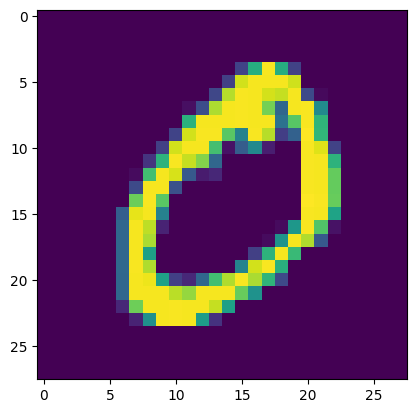

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

# Carga del conjunto de datos MNIST
mnist = keras.datasets.mnist

# Carga de la división de entrenamiento y prueba de los conjuntos de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Impresión de etiquetas e imagen
index = 1

np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image: \n{training_images[index]}')

# Visualización de la imagen
plt.imshow(training_images[index])
plt.show()

# Normalización de los valores de píxeles
training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [3]:
# Compilación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Entrenamiento
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2558 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1129 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0775 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0570 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

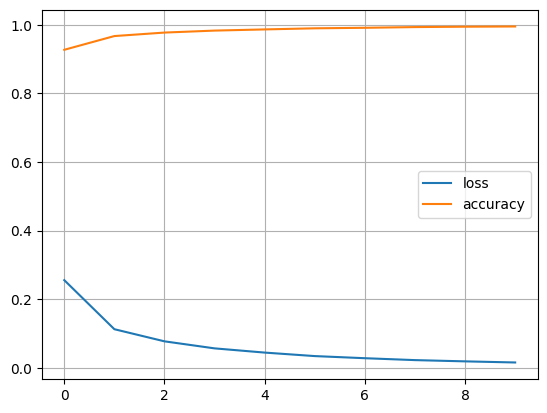

In [6]:
import pandas as pd

# Gráfica del historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
plt.show()

In [8]:
# Evaluación del modelo en los conjuntos de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Loss in train: {loss}')
print(f'Accuracy in train: {accuracy}')

# Evaluación del modelo en los conjuntos de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss in test: {loss}')
print(f'Accuracy in test: {accuracy}')

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.9943
Loss in train: 0.01721971295773983
Accuracy in train: 0.9943333268165588
313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9766
Loss in test: 0.09087547659873962
Accuracy in test: 0.9765999913215637


In [9]:
# Evaluación del modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss in test: {loss}')
print(f'Accuracy in test: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9766
Loss in test: 0.09087547659873962
Accuracy in test: 0.9765999913215637
